In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
# adding Folder_2 to the system path
sys.path.insert(0, '../src')

from ANNwithPatchMatch import getANNShiftmap
from ReconstructingTheImage import reconstruct,Reconstruction,finalReconstruction
from ConstructingTextures import constructingTextures
from pyramids import imagePyramidOcclusionPyramid,TextureFeaturePyramid,upSample
from onionPeel import OnionPeel 
import numpy as np

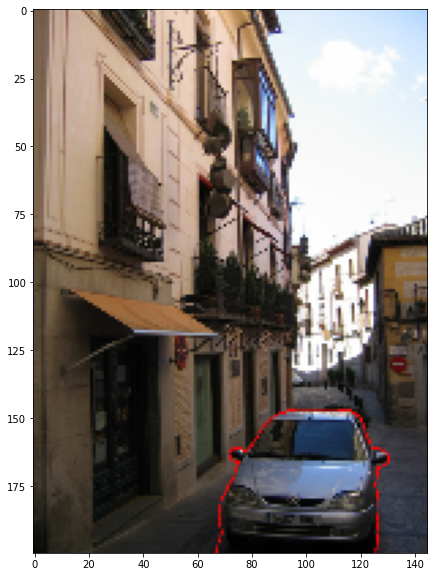

In [2]:
image=cv2.imread("../images/stick.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ori=cv2.imread("../images/car.png")
ori = cv2.cvtColor(ori, cv2.COLOR_BGR2RGB)
h,w,_=ori.shape
ori=cv2.resize(ori,(w//4, h//4))
fig = plt.figure(figsize=(10, 10))
plt.imshow(ori)
psize = 7

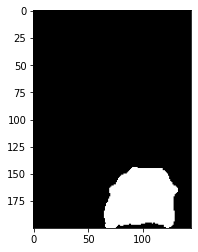

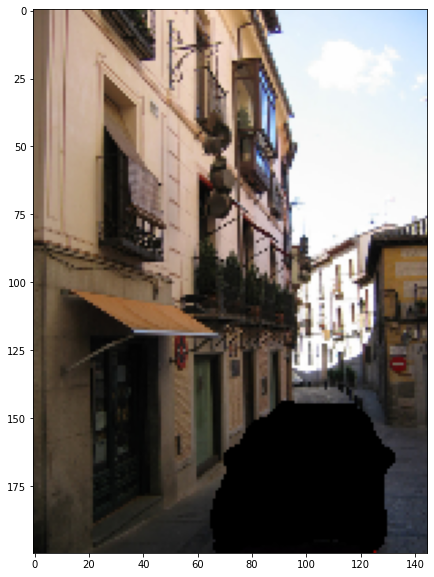

In [3]:
# m,n,_=image.shape
# H=[]
# Hbinary=np.zeros((m,n),dtype='uint8')
# for i in range(m):
#     for j in range(n):
#         if image[i,j,1]>240:
#             image[i,j] = [0,0,0]
#             H.append([i,j])
#             Hbinary[i,j]=1
# H=np.array(H,dtype=int)
# fig = plt.figure(figsize=(10, 10))
Hbinary=cv2.imread("../images/carmask.png")
Hbinary = cv2.cvtColor(Hbinary, cv2.COLOR_BGR2GRAY)
h,w=Hbinary.shape
Hbinary=cv2.resize(Hbinary,(w//4,h//4))

Hbinary[Hbinary>=1]=1
plt.imshow(Hbinary,'gray')


m,n,_=ori.shape
for i in range(m):
    for j in range(n):
        if Hbinary[i,j]>0:
            ori[i,j] = [0,0,0]


fig = plt.figure(figsize=(10, 10))
plt.imshow(ori)

In [4]:
Images,Hvalues, binaries = imagePyramidOcclusionPyramid(np.copy(ori), Hbinary, psize)
textures=TextureFeaturePyramid(np.copy(ori), Hbinary, psize)

3


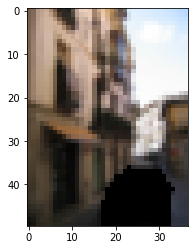

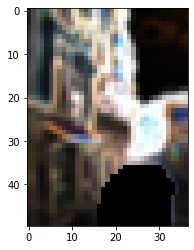

In [5]:
print(len(Images))
# print(Images[0])
# Images[-1] = Images[-1].astype('uint8')
plt.imshow(Images[-1])
plt.show()
plt.imshow(textures[-1])


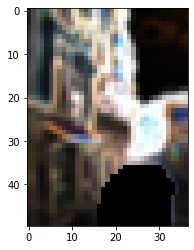

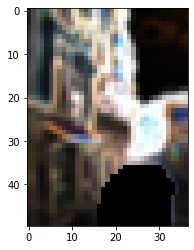

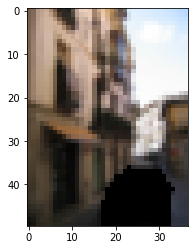

In [6]:
inp = np.copy(Images[-1])
plt.imshow(textures[-1])
plt.show()
tt = np.copy(textures[-1])
for i in range(textures[-1].shape[0]):
    for j in range(textures[-1].shape[1]):
        for k in range(textures[-1].shape[2]):
            if binaries[-1][i,j] == 1:
                tt[i,j] = [0,0,0]
plt.imshow(tt)
plt.show()
plt.imshow(inp)
                

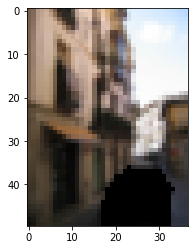

55


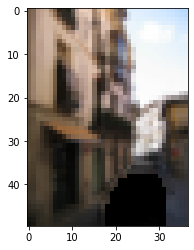

51


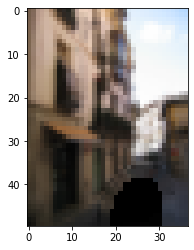

38


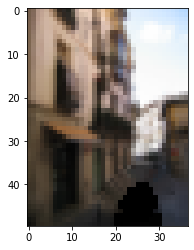

26


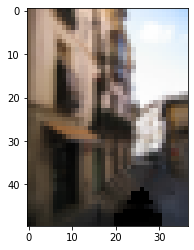

13


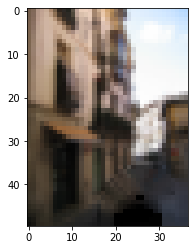

2


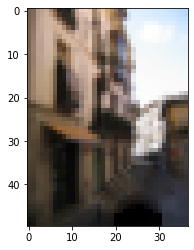

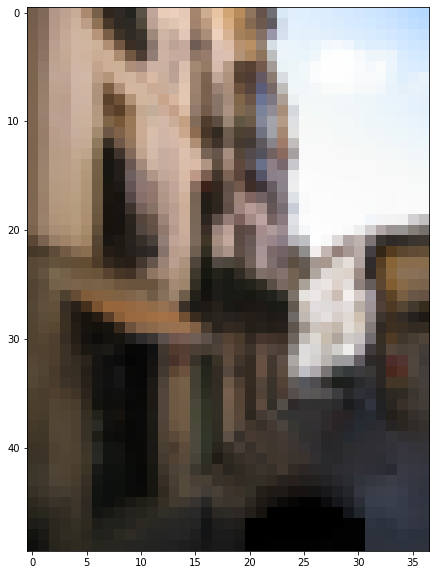

In [7]:
plt.imshow(inp)
plt.show()
img,T,shiftmap=OnionPeel(Images[-1], textures[-1], Hvalues[-1], 7,50)
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)

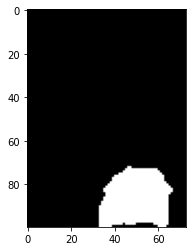

In [8]:
plt.imshow(binaries[1], 'gray')
plt.show()

3


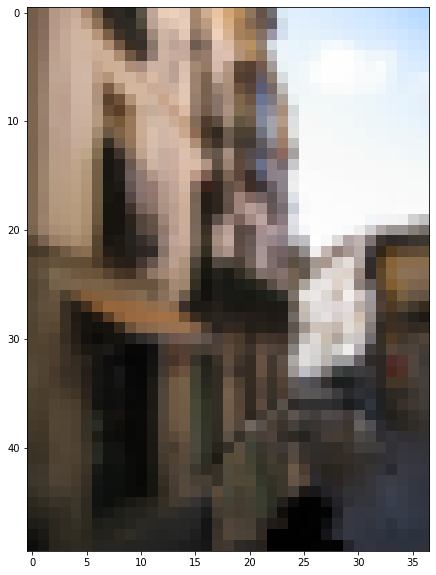

After processing


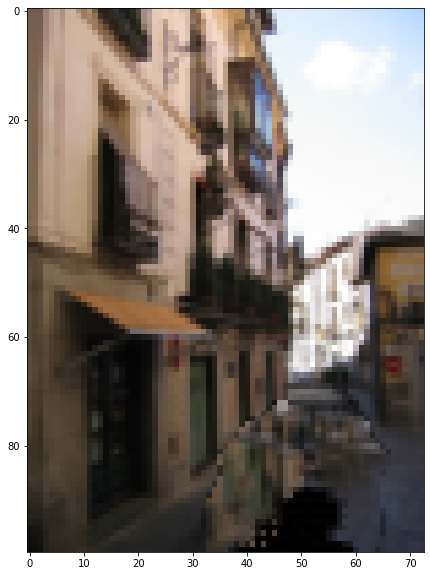

5


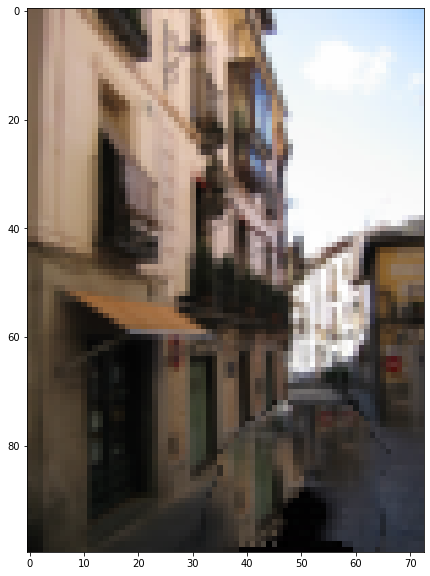

After processing


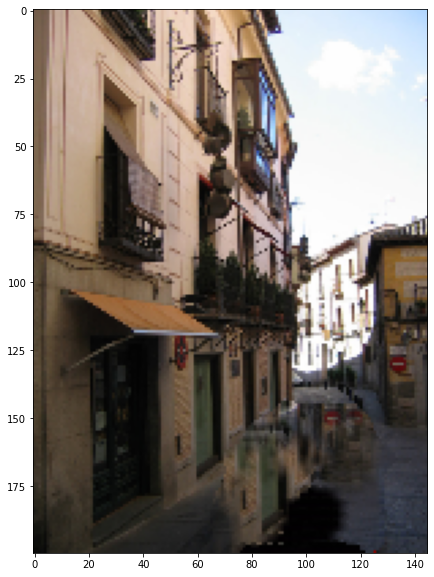

7


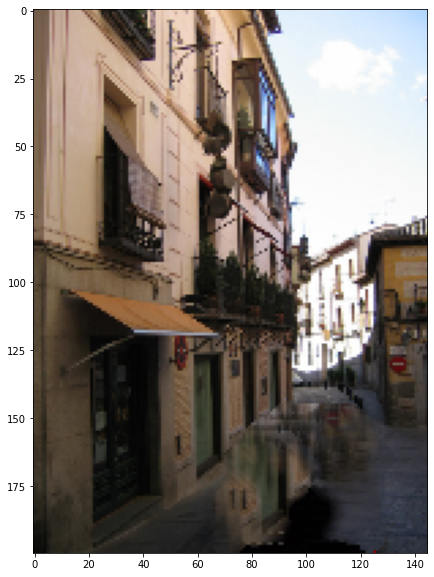

In [9]:
k=0
e=1
pp = 3
L=len(Images)
Images[L-1]=img.copy()
shiftmapL=shiftmap.copy()
textures[L-1]=T.copy()
for l in range(L-1,-1,-1):
    print(pp)
    k = 0
    e=1
    while e>0.1 and k<10:
        bimg=Images[l].copy()
        shiftmapL=getANNShiftmap(Images[l].copy(),Hvalues[l].copy(),shiftmapL,10,textures[l].copy(),pp,50)
        Images[l]=Reconstruction(Images[l] ,textures[l] ,Images[l].copy(), shiftmapL,Hvalues[l].copy(),pp,binaries[l].copy(),50)
        textures[l]=Reconstruction(textures[l] ,textures[l] ,Images[l].copy(), shiftmapL,Hvalues[l].copy(),pp,binaries[l].copy(),50)
        k+=1
        tempe=0
        for i,j in Hvalues[l]:
            tempe+=np.sum(np.abs(bimg[i,j]- Images[l][i,j]))
        e=(tempe)/(3*len(Hvalues[l]))
    
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(Images[l])
    plt.show()
    if l==0:
        shiftmapL=getANNShiftmap(Images[l].copy(),Hvalues[l].copy(),shiftmapL,30,textures[l].copy(),pp,50)
        Images[l],_=finalReconstruction(Images[l].copy(),textures[l].copy(), shiftmapL, Hvalues[l].copy(),pp,50)
        break
    m,n,_=Images[l-1].shape
    shiftmapnew=np.zeros((m,n,2),dtype='int')
    shiftmapL=upSample(shiftmapL,shiftmapnew, binaries[l-1].copy(), binaries[l].copy())
    l-=1
    Images[l]=Reconstruction(Images[l] ,textures[l] ,Images[l].copy(), shiftmapL,Hvalues[l].copy(),pp,binaries[l].copy(),50)
    textures[l]=Reconstruction(textures[l] ,textures[l] ,Images[l].copy(), shiftmapL,Hvalues[l].copy(),pp,binaries[l].copy(),50)
    print("After processing")
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(Images[l])
    plt.show()
    l+=1
    pp += 2
    pp=min(7,pp)

In [10]:
# Images[0],_=finalReconstruction(Images[0][3: m-3, 3: n-3].copy(),textures[0].copy(), shiftmapL, Hvalues[0].copy(),pp,50)
# Images[0],_=finalReconstruction(Images[0][3: m-3, 3: n-3].copy(),textures[0].copy(), shiftmapL, Hvalues[0].copy(),pp,50)
# Images[0],_=finalReconstruction(Images[0][3: m-3, 3: n-3].copy(),textures[0].copy(), shiftmapL, Hvalues[0].copy(),pp,50)

ValueError: operands could not be broadcast together with shapes (7,7,3) (7,3,3) 

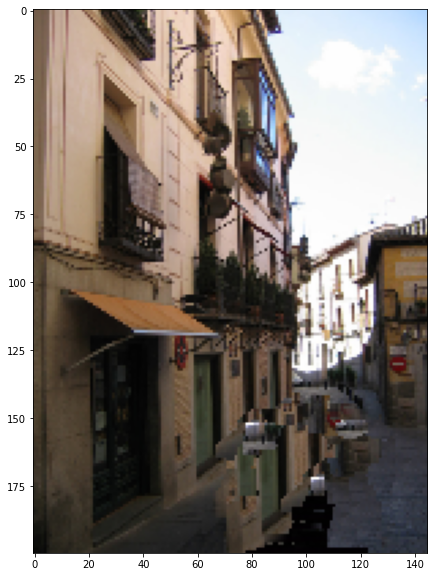

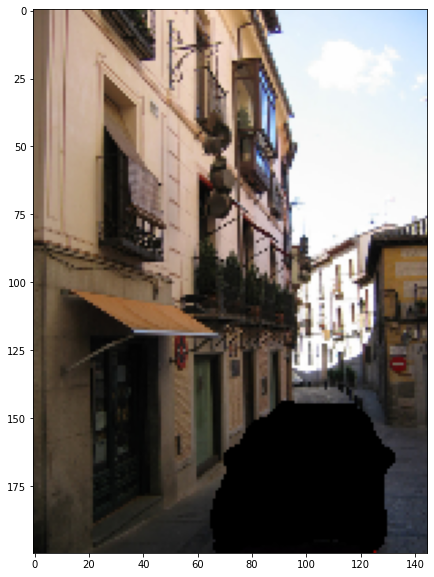

In [11]:

fig = plt.figure(figsize=(10, 10))
m = Images[0].shape[0]
n = Images[0].shape[1]
plt.imshow(Images[0][3: m-3, 3: n-3])
plt.show()
fig = plt.figure(figsize=(10, 10))
plt.imshow(ori)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(Images[0])
plt.show()



In [ ]:
# m,n,_=img.shape
# H=[]
# for i in range(m):
#     for j in range(n):
#         if img[i,j,1]>240:
#             H.append([i,j])
#             img[i,j]=[0,0,0]
# H=np.array(H,dtype=int)
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(img)